In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [2]:
df_original =pd.read_csv('product_category.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_original

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...,...
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717


Exploratory Data Analysis (EDA)

Display the first few rows

In [4]:
df_original.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [5]:
df_original.tail()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
99995,726461,A,2,56.078258,7/17/2023 16:59,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
99996,328056,A,6,88.516406,5/30/2023 9:04,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
99997,887304,B,4,72.385564,8/25/2023 7:59,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472
99998,326401,C,5,66.542239,2/5/2024 19:45,PayPal,"18756 Mcfarland Way Suite 866\nBarnettside, PR...",Electronics,14.345018,284.983717
99999,771566,C,5,38.087766,2/4/2024 11:53,Debit Card,"8046 Hull Drive\nPaulstad, GU 87218",Home Decor,2.966058,184.790305


In [6]:
print('Shape of DataFrame (Observations and Rows) = ', df_original.shape)

Shape of DataFrame (Observations and Rows) =  (100000, 10)


Data type

In [7]:
df_original.dtypes

CustomerID              int64
ProductID              object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
StoreLocation          object
ProductCategory        object
DiscountApplied(%)    float64
TotalAmount           float64
dtype: object

In [8]:
df_original.dtypes.value_counts()

object     5
float64    3
int64      2
dtype: int64

Column Names

In [9]:
df_original.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

In [10]:
df_original.info

<bound method DataFrame.info of        CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
2          579675         A         8  31.528816   3/11/2024 18:51   
3          799826         D         5  98.880218  10/27/2023 22:00   
4          121413         A         7  93.188512  12/22/2023 11:38   
...           ...       ...       ...        ...               ...   
99995      726461         A         2  56.078258   7/17/2023 16:59   
99996      328056         A         6  88.516406    5/30/2023 9:04   
99997      887304         B         4  72.385564    8/25/2023 7:59   
99998      326401         C         5  66.542239    2/5/2024 19:45   
99999      771566         C         5  38.087766    2/4/2024 11:53   

      PaymentMethod                                      StoreLocation  \
0              Cash            176 Andrew Cliffs\nBai

In [11]:
df_original.shape

(100000, 10)

In [12]:
values = df_original.values
values

array([[109318, 'C', 7, ..., 'Books', 18.6770995, 455.8627638],
       [993229, 'C', 4, ..., 'Home Decor', 14.12136502, 258.3065464],
       [579675, 'A', 8, ..., 'Books', 15.94370066, 212.0156509],
       ...,
       [887304, 'B', 4, ..., 'Clothing', 17.42397944, 239.0924721],
       [326401, 'C', 5, ..., 'Electronics', 14.34501785, 284.9837168],
       [771566, 'C', 5, ..., 'Home Decor', 2.966058044, 184.7903051]],
      dtype=object)

Lets now visualize the number of distinct values in each feature

In [13]:
for col in df_original.columns:
    print(col, ': Number of Distinct Values: ', len(df_original[col].unique()))

CustomerID : Number of Distinct Values:  95215
ProductID : Number of Distinct Values:  4
Quantity : Number of Distinct Values:  9
Price : Number of Distinct Values:  100000
TransactionDate : Number of Distinct Values:  91025
PaymentMethod : Number of Distinct Values:  4
StoreLocation : Number of Distinct Values:  100000
ProductCategory : Number of Distinct Values:  4
DiscountApplied(%) : Number of Distinct Values:  100000
TotalAmount : Number of Distinct Values:  99998


Print the distinct values in each feature

In [14]:
for col in df_original:
    print('COLUMN NAME: ', col,':')
    print(df_original[col].unique())
    print('\n')

COLUMN NAME:  CustomerID :
[109318 993229 579675 ... 887304 326401 771566]


COLUMN NAME:  ProductID :
['C' 'A' 'D' 'B']


COLUMN NAME:  Quantity :
[7 4 8 5 3 6 2 1 9]


COLUMN NAME:  Price :
[80.07984415 75.19522942 31.52881648 ... 72.38556379 66.54223948
 38.08776628]


COLUMN NAME:  TransactionDate :
['12/26/2023 12:32' '8/5/2023 0:00' '3/11/2024 18:51' ...
 '7/17/2023 16:59' '8/25/2023 7:59' '2/4/2024 11:53']


COLUMN NAME:  PaymentMethod :
['Cash' 'PayPal' 'Debit Card' 'Credit Card']


COLUMN NAME:  StoreLocation :
['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218']


COLUMN NAME:  ProductCategory :
['Books' 'Home Decor' 'Electronics' 'Clothing']


COLUMN NAME:  DiscountApplied(%) :
[18.6770995  14.12136502 15.94370066 ... 17.42397944 14

#### Duplicates

We will now look for duplicates in our dataset

In [15]:
duplicate_rows_df = df_original[df_original.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


We have no duplicated rows in our dataset

Summary Statistics

In [16]:
df_original.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


In [17]:
df_original.describe(include=object)

,ProductID,TransactionDate,PaymentMethod,StoreLocation,ProductCategory
count,100000,100000,100000,100000,100000
unique,4,91025,4,100000,4
top,C,4/3/2024 23:55,PayPal,"176 Andrew Cliffs\nBaileyfort, HI 93354",Clothing
freq,25209,5,25067,1,25056


In [18]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,500463.982180,288460.917524,14.000000,250693.750000,499679.000000,751104.750000,999997.000000
Quantity,100000.0,5.009290,2.579808,1.000000,3.000000,5.000000,7.000000,9.000000
Price,100000.0,55.067344,25.971567,10.000430,32.549474,55.116789,77.456763,99.999284
DiscountApplied(%),100000.0,10.020155,5.779534,0.000046,5.001013,10.030353,15.018367,19.999585
TotalAmount,100000.0,248.334955,184.554792,8.274825,95.163418,200.368393,362.009980,896.141242


In [19]:
numerical_summary = df_original.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.000000,500463.982180,288460.917524,14.000000,250693.750000,499679.000000,751104.750000,999997.000000
Quantity,100000.000000,5.009290,2.579808,1.000000,3.000000,5.000000,7.000000,9.000000
Price,100000.000000,55.067344,25.971567,10.000430,32.549474,55.116789,77.456763,99.999284
DiscountApplied(%),100000.000000,10.020155,5.779534,0.000046,5.001013,10.030353,15.018367,19.999585
TotalAmount,100000.000000,248.334955,184.554792,8.274825,95.163418,200.368393,362.009980,896.141242


We will now visualize the descriptive statistics for Quantitative columns

In [20]:
numerical_cols = ['Quantity', 'DiscountApplied(%)', 'Price', 'TotalAmount']
print("Descriptive Statistics for Numerical Columns:")
print(df_original[numerical_cols].describe())

Descriptive Statistics for Numerical Columns:
            Quantity  DiscountApplied(%)          Price    TotalAmount
count  100000.000000       100000.000000  100000.000000  100000.000000
mean        5.009290           10.020155      55.067344     248.334955
std         2.579808            5.779534      25.971567     184.554792
min         1.000000            0.000046      10.000430       8.274825
25%         3.000000            5.001013      32.549474      95.163418
50%         5.000000           10.030353      55.116789     200.368393
75%         7.000000           15.018367      77.456763     362.009980
max         9.000000           19.999585      99.999284     896.141242


#### Check the different values in each feature

To better understand each feature, we will now use df_original[col].unique in order to visualize every unique value in each column

In [21]:
for col in df_original:
    print('COLUMN NAME: ', col,':')
    print(df_original[col].unique())
    print('\n')

COLUMN NAME:  CustomerID :
[109318 993229 579675 ... 887304 326401 771566]


COLUMN NAME:  ProductID :
['C' 'A' 'D' 'B']


COLUMN NAME:  Quantity :
[7 4 8 5 3 6 2 1 9]


COLUMN NAME:  Price :
[80.07984415 75.19522942 31.52881648 ... 72.38556379 66.54223948
 38.08776628]


COLUMN NAME:  TransactionDate :
['12/26/2023 12:32' '8/5/2023 0:00' '3/11/2024 18:51' ...
 '7/17/2023 16:59' '8/25/2023 7:59' '2/4/2024 11:53']


COLUMN NAME:  PaymentMethod :
['Cash' 'PayPal' 'Debit Card' 'Credit Card']


COLUMN NAME:  StoreLocation :
['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218']


COLUMN NAME:  ProductCategory :
['Books' 'Home Decor' 'Electronics' 'Clothing']


COLUMN NAME:  DiscountApplied(%) :
[18.6770995  14.12136502 15.94370066 ... 17.42397944 14

Date into Datetime

We will now transform the column TransactionDate into datetime for a more concise date and time investigation of our dataset.

And we will det date column as index for a clearer understanding of when the transavtions happened.

In [22]:
from datetime import datetime

In [23]:
df_original['TransactionDate']=pd.to_datetime(df_original['TransactionDate'])

In [24]:
df_original = df_original.set_index('TransactionDate')

In [25]:
df_original

,CustomerID,ProductID,Quantity,Price,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
TransactionDate,,,,,,,,,
2023-12-26 12:32:00,109318,C,7,80.079844,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
2023-08-05 00:00:00,993229,C,4,75.195229,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2024-03-11 18:51:00,579675,A,8,31.528816,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
2023-10-27 22:00:00,799826,D,5,98.880218,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
2023-12-22 11:38:00,121413,A,7,93.188512,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
...,...,...,...,...,...,...,...,...,...
2023-07-17 16:59:00,726461,A,2,56.078258,Credit Card,"3632 Darren Station Apt. 553\nEricaborough, RI...",Clothing,18.345145,91.581240
2023-05-30 09:04:00,328056,A,6,88.516406,Credit Card,"821 Taylor Shoals\nEvansville, IL 70845",Electronics,3.995541,509.878179
2023-08-25 07:59:00,887304,B,4,72.385564,Credit Card,"50653 Kara Lakes\nStephanieborough, RI 94492",Clothing,17.423979,239.092472


We want to visualize the first and last day of transactions to better understand my dataset.

To do so we will create a line plot connecting the first and last day of transactions.

First Transaction Date: 2023-04-29 22:27:00
Last Transaction Date: 2024-04-28 22:22:00


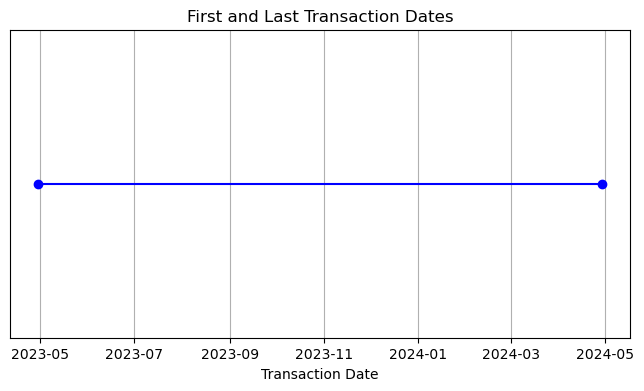

In [26]:
first_day = df_original.index.min()
last_day = df_original.index.max()
print(f"First Transaction Date: {first_day}")
print(f"Last Transaction Date: {last_day}")
plt.figure(figsize=(8, 4))
plt.plot([first_day, last_day], [0, 0], marker='o', linestyle='-', color='blue')
plt.yticks([])  
plt.xlabel('Transaction Date')
plt.title('First and Last Transaction Dates')
plt.grid(True)
plt.show()

We will now investigate and create a line plot for the amount of daily transaction

Daily Transaction Counts:
TransactionDate
2023-04-29     14
2023-04-30    250
2023-05-01    263
2023-05-02    285
2023-05-03    268
             ... 
2024-04-24    276
2024-04-25    264
2024-04-26    306
2024-04-27    266
2024-04-28    241
Freq: D, Length: 366, dtype: int64


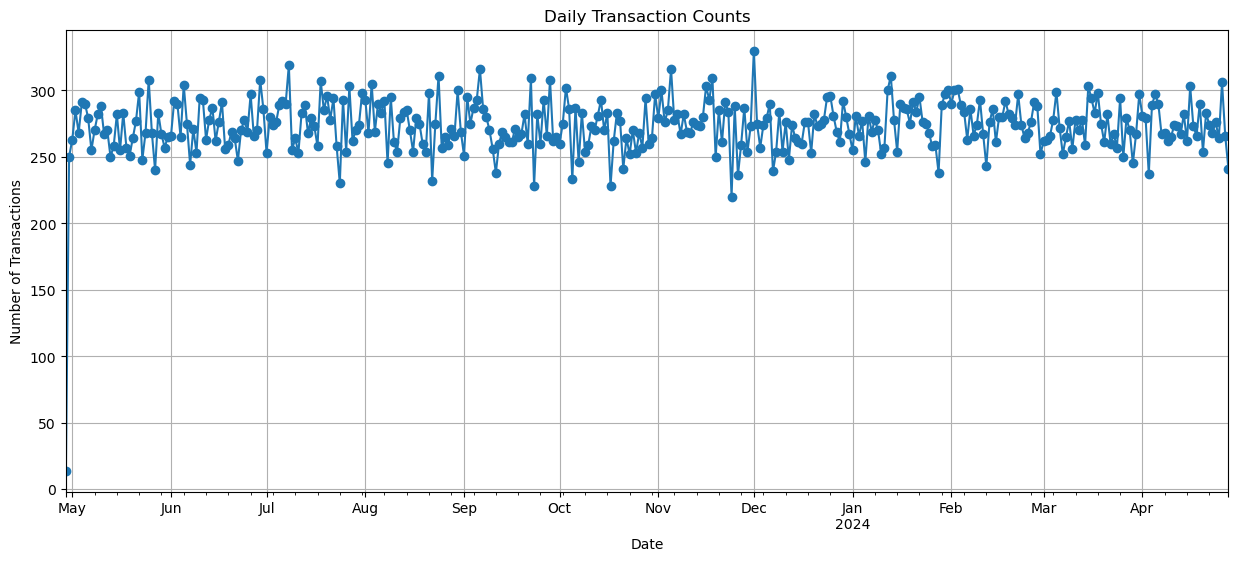

In [27]:
daily_transactions = df_original.resample('D').size()
print("Daily Transaction Counts:")
print(daily_transactions)

plt.figure(figsize=(15, 6))
daily_transactions.plot(marker='o')
plt.title('Daily Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

Next we will investigate the total amount of daily sales


Daily Total Sales:
TransactionDate
2023-04-29     2241.869279
2023-04-30    58598.918575
2023-05-01    62845.530099
2023-05-02    76296.207253
2023-05-03    63935.346826
                  ...     
2024-04-24    67860.159728
2024-04-25    66335.834049
2024-04-26    70107.702288
2024-04-27    60887.308483
2024-04-28    53417.609878
Freq: D, Name: TotalAmount, Length: 366, dtype: float64


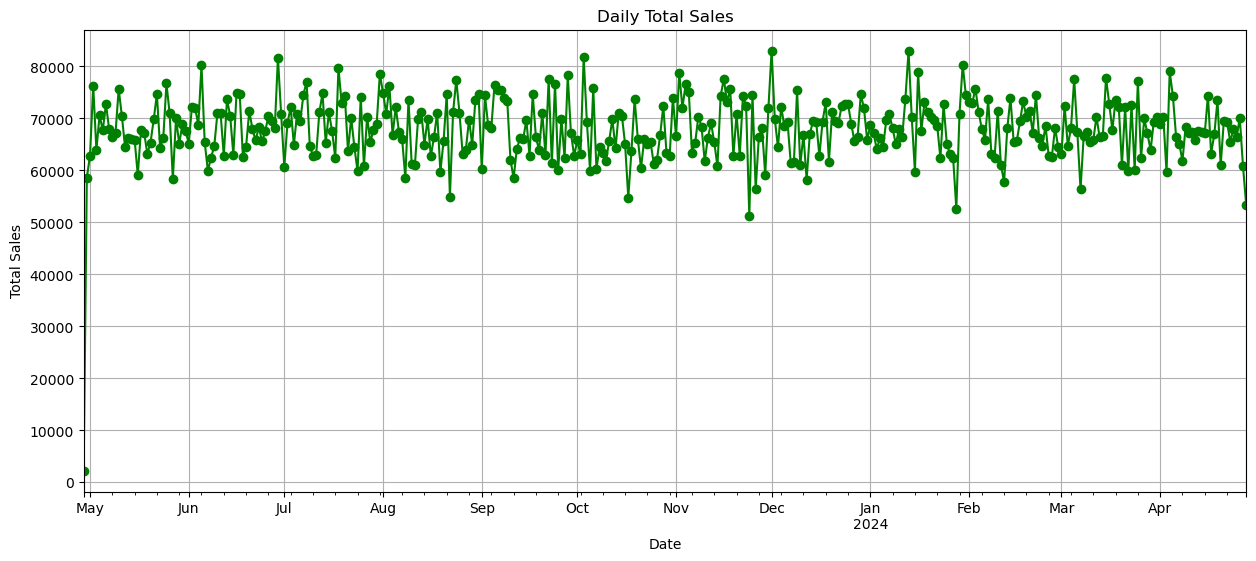

In [28]:
daily_sales = df_original.resample('D')['TotalAmount'].sum()
print("\nDaily Total Sales:")
print(daily_sales)

plt.figure(figsize=(15, 6))
daily_sales.plot(marker='o', color='green')
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Weekly Transaction count


Weekly Transaction Counts:
TransactionDate
2023-04-30     264
2023-05-07    1931
2023-05-14    1885
2023-05-21    1869
2023-05-28    1914
2023-06-04    1902
2023-06-11    1934
2023-06-18    1913
2023-06-25    1856
2023-07-02    1960
2023-07-09    1995
2023-07-16    1909
2023-07-23    1976
2023-07-30    1886
2023-08-06    2006
2023-08-13    1910
2023-08-20    1877
2023-08-27    1897
2023-09-03    1927
2023-09-10    1988
2023-09-17    1825
2023-09-24    1893
2023-10-01    1914
2023-10-08    1912
2023-10-15    1900
2023-10-22    1838
2023-10-29    1854
2023-11-05    2017
2023-11-12    1922
2023-11-19    1982
2023-11-26    1865
2023-12-03    1935
2023-12-10    1874
2023-12-17    1859
2023-12-24    1932
2023-12-31    1946
2024-01-07    1875
2024-01-14    1946
2024-01-21    1967
2024-01-28    1869
2024-02-04    2066
2024-02-11    1933
2024-02-18    1918
2024-02-25    1938
2024-03-03    1898
2024-03-10    1899
2024-03-17    1965
2024-03-24    1900
2024-03-31    1902
2024-04-07    1940
2024-0

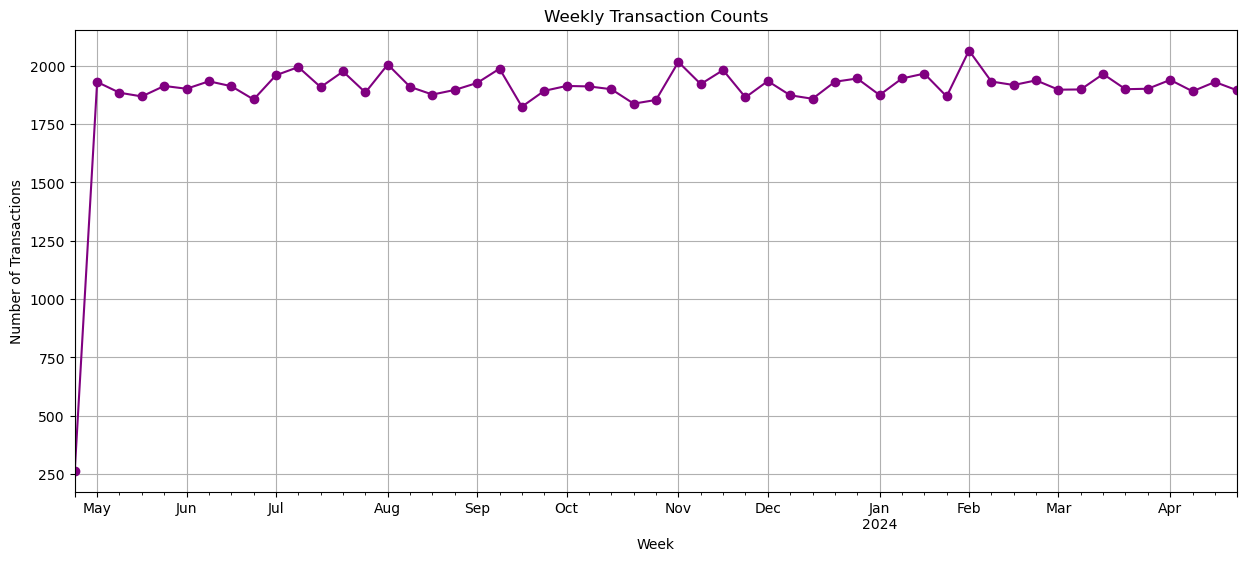

In [29]:
weekly_transactions = df_original.resample('W').size()
print("\nWeekly Transaction Counts:")
print(weekly_transactions)

plt.figure(figsize=(15, 6))
weekly_transactions.plot(marker='o', color='purple')
plt.title('Weekly Transaction Counts')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

Weekly Transaction Sales (Total amount)


Weekly Total Sales:
TransactionDate
2023-04-30     60840.787854
2023-05-07    481984.084105
2023-05-14    476509.160280
2023-05-21    458240.848777
2023-05-28    481252.924503
2023-06-04    479776.144245
2023-06-11    474594.408139
2023-06-18    482094.301263
2023-06-25    471040.740195
2023-07-02    490290.312243
2023-07-09    493665.188679
2023-07-16    475695.429188
2023-07-23    487646.575743
2023-07-30    467175.090747
2023-08-06    506801.151744
2023-08-13    461368.866844
2023-08-20    460371.547863
2023-08-27    476403.035503
2023-09-03    486192.507610
2023-09-10    504864.285987
2023-09-17    461856.971392
2023-09-24    479848.603343
2023-10-01    466255.801749
2023-10-08    474732.461392
2023-10-15    466406.420406
2023-10-22    449578.539390
2023-10-29    456200.191007
2023-11-05    505692.064368
2023-11-12    464615.607440
2023-11-19    489662.231336
2023-11-26    462511.626807
2023-12-03    482958.820625
2023-12-10    469513.583564
2023-12-17    462979.498840
2023-12-24 

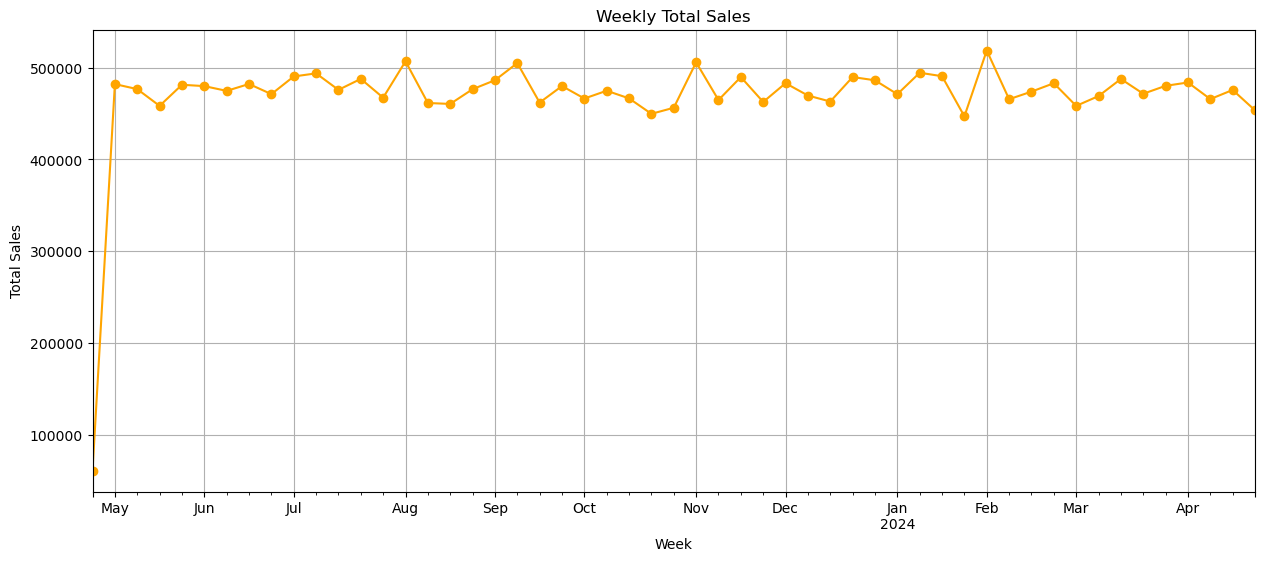

In [30]:
weekly_sales = df_original.resample('W')['TotalAmount'].sum()
print("\nWeekly Total Sales:")
print(weekly_sales)

plt.figure(figsize=(15, 6))
weekly_sales.plot(marker='o', color='orange')
plt.title('Weekly Total Sales')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Monthly Transactions


Monthly Transaction Counts:
TransactionDate
2023-04-30     264
2023-05-31    8388
2023-06-30    8243
2023-07-31    8597
2023-08-31    8498
2023-09-30    8181
2023-10-31    8325
2023-11-30    8298
2023-12-31    8473
2024-01-31    8543
2024-02-29    8076
2024-03-31    8457
2024-04-30    7657
Freq: M, dtype: int64


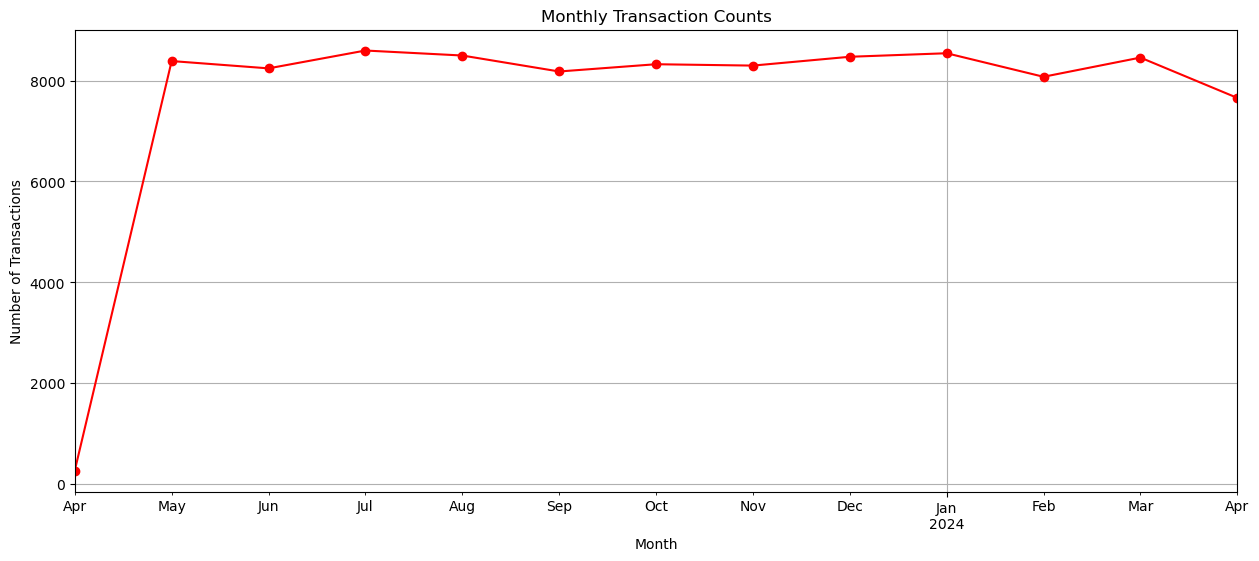

In [31]:
monthly_transactions = df_original.resample('M').size()
print("\nMonthly Transaction Counts:")
print(monthly_transactions)

plt.figure(figsize=(15, 6))
monthly_transactions.plot(marker='o', color='red')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

### Data Cleaning

We will now clean the new dataset to improve data consistency by standardizing and harmonizing the data making it consistent and comparable. Overall I want my data to be reliable and consistent which in turn will lead to a more robust and trustworthy insights and conclusions. I will follow this steps:

Locate any missing values

check for duplicated items

Number of missing data points per column

NaN values will be marked as True

In [32]:
df_original.isnull()

,CustomerID,ProductID,Quantity,Price,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
TransactionDate,,,,,,,,,
2023-12-26 12:32:00,False,False,False,False,False,False,False,False,False
2023-08-05 00:00:00,False,False,False,False,False,False,False,False,False
2024-03-11 18:51:00,False,False,False,False,False,False,False,False,False
2023-10-27 22:00:00,False,False,False,False,False,False,False,False,False
2023-12-22 11:38:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2023-07-17 16:59:00,False,False,False,False,False,False,False,False,False
2023-05-30 09:04:00,False,False,False,False,False,False,False,False,False
2023-08-25 07:59:00,False,False,False,False,False,False,False,False,False


How many missing values do we have?

In [33]:
missing_values_count = df_original.isnull().sum()
missing_values_count[:]

CustomerID            0
ProductID             0
Quantity              0
Price                 0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

In [34]:
total_cells = np.product(df_original.shape)
total_missing = missing_values_count.sum()

In [35]:
total_missing

0

### Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. 

#### Boxplot

<Axes: xlabel='Quantity'>

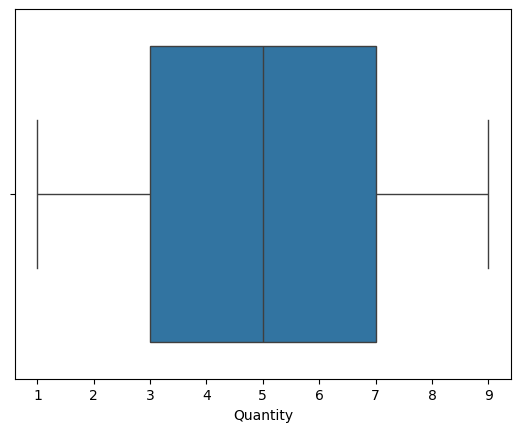

In [36]:
sns.boxplot(x=df_original['Quantity'])

<Axes: xlabel='Price'>

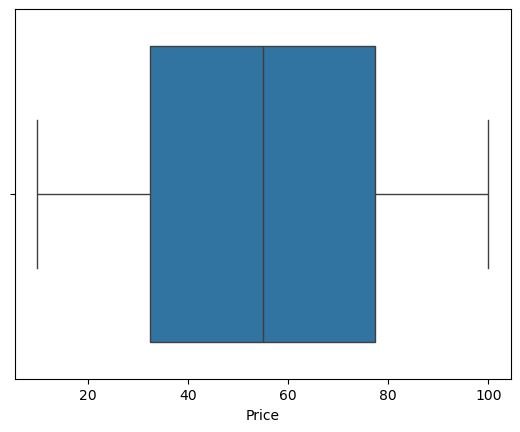

In [37]:
sns.boxplot(x=df_original['Price'])

<Axes: xlabel='TotalAmount'>

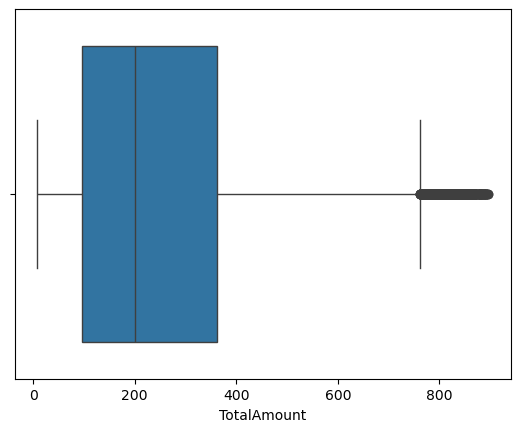

In [38]:
sns.boxplot(x=df_original['TotalAmount'])

<Axes: xlabel='DiscountApplied(%)'>

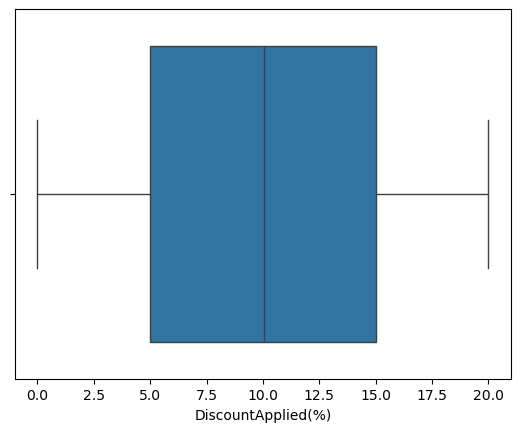

In [39]:
sns.boxplot(x=df_original['DiscountApplied(%)'])

### Histograms

The following histogram will give us the frequency of total amount

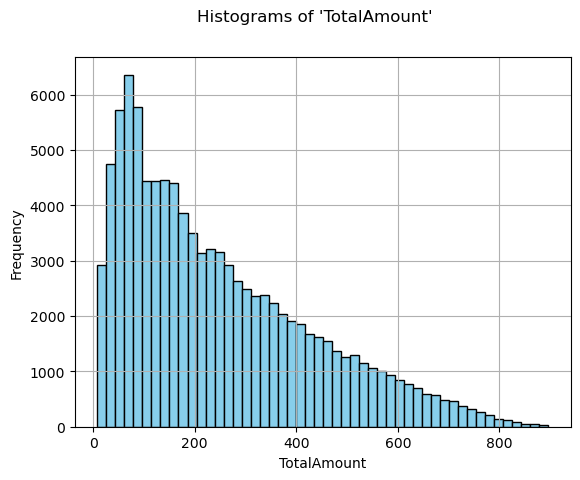

In [40]:
df_original['TotalAmount'].hist( bins=50, color='skyblue',edgecolor='black')

plt.suptitle("Histograms of 'TotalAmount'")
plt.xlabel('TotalAmount')
plt.ylabel('Frequency')
plt.show()

Histogram for numerical columns

The following Histograms visualize the distribution of numerical columns.

kde=True adds a kernel density estimation line.

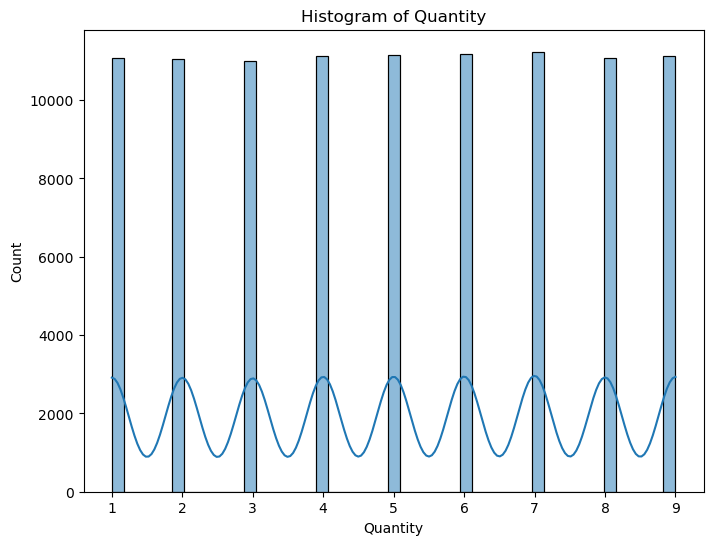

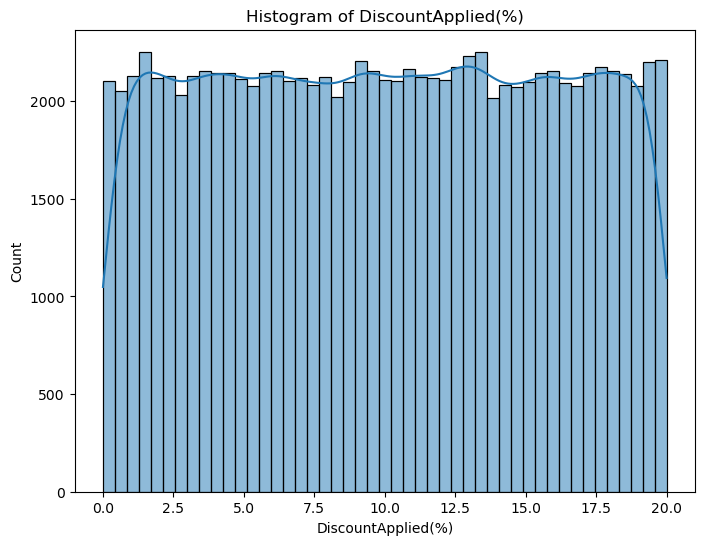

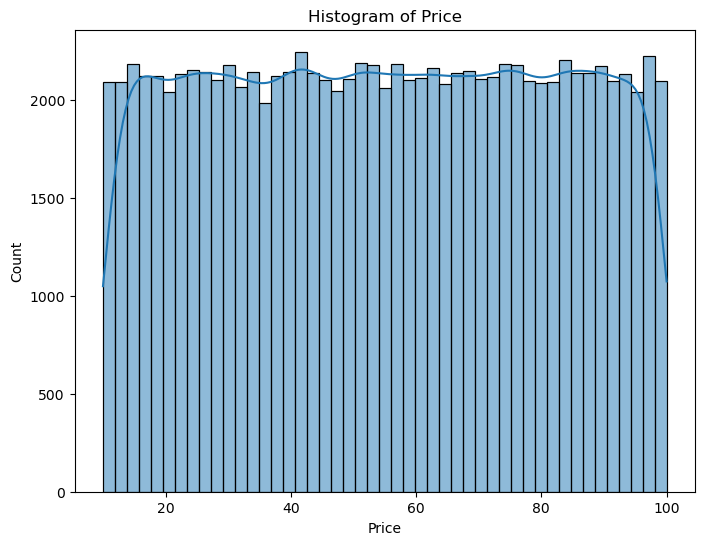

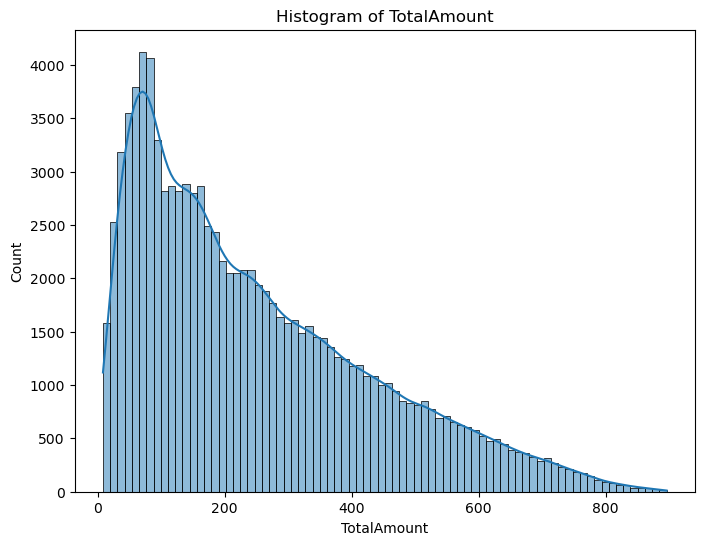

In [41]:
numerical_cols = ['Quantity', 'DiscountApplied(%)', 'Price', 'TotalAmount']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_original[col].dropna(), kde=True)  
    plt.title(f'Histogram of {col}')
    plt.show()

In the next histogram, we can see the frequency of discount applied.

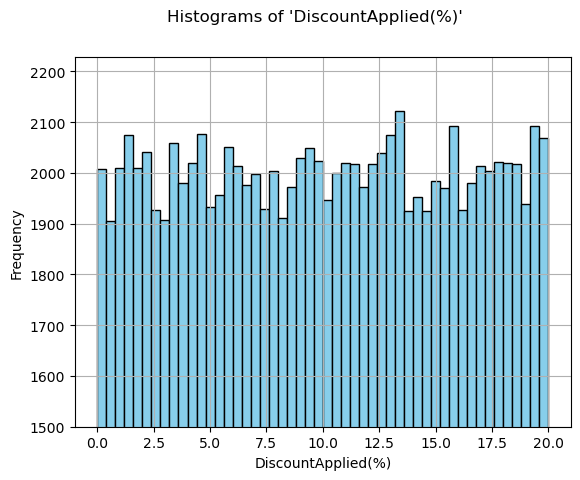

In [42]:
df_original['DiscountApplied(%)'].hist( bins=50, color='skyblue',edgecolor='black')
plt.ylim(bottom=1500)

plt.suptitle("Histograms of 'DiscountApplied(%)'")
plt.xlabel('DiscountApplied(%)')
plt.ylabel('Frequency')
plt.show()

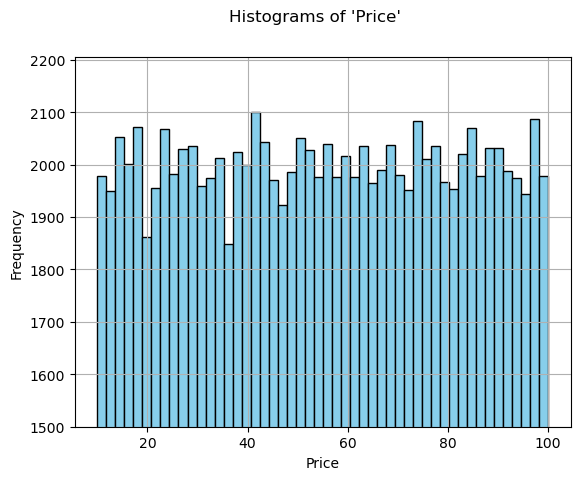

In [43]:
df_original['Price'].hist( bins=50, color='skyblue',edgecolor='black')
#starting frequency from 1500
plt.ylim(bottom=1500)

plt.suptitle("Histograms of 'Price'")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Boxplots

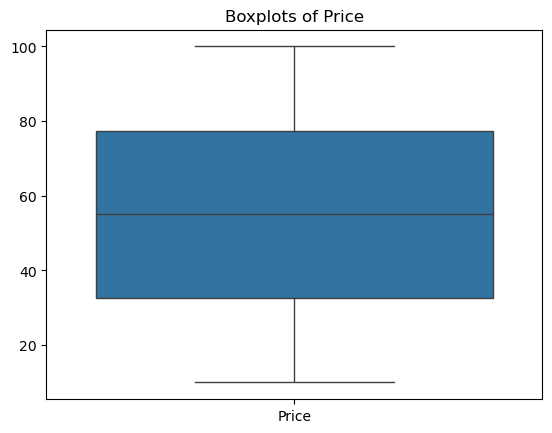

In [44]:
sns.boxplot(df_original[['Price']])
plt.title("Boxplots of Price")
plt.show()



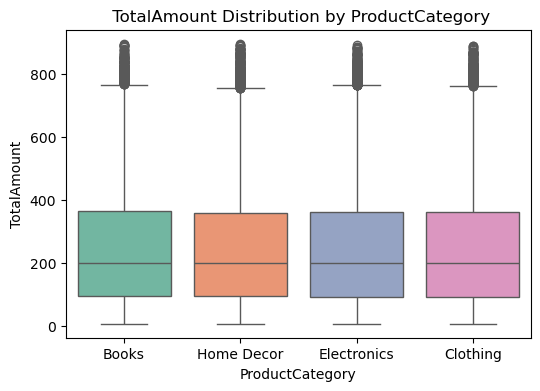

In [45]:
if 'ProductCategory' in df_original.columns and 'TotalAmount' in df_original.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='ProductCategory', y='TotalAmount', data=df_original, hue=df_original['ProductCategory'], palette="Set2")
    plt.xlabel("ProductCategory")
    plt.ylabel("TotalAmount")
    plt.title(" TotalAmount Distribution by ProductCategory")
    plt.show()

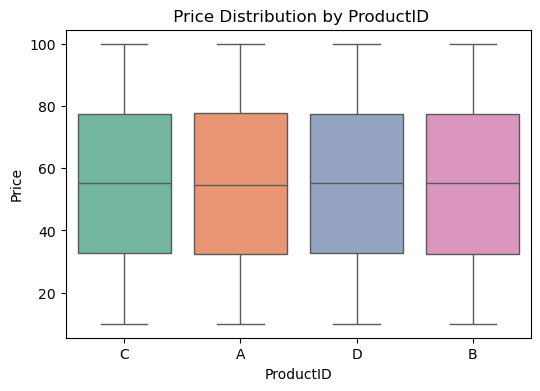

In [46]:
if 'ProductID' in df_original.columns and 'Price' in df_original.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='ProductID', y='Price', data=df_original, hue=df_original['ProductID'], palette="Set2")
    plt.xlabel("ProductID")
    plt.ylabel("Price")
    plt.title(" Price Distribution by ProductID")
    plt.show()


A correlation heatmap

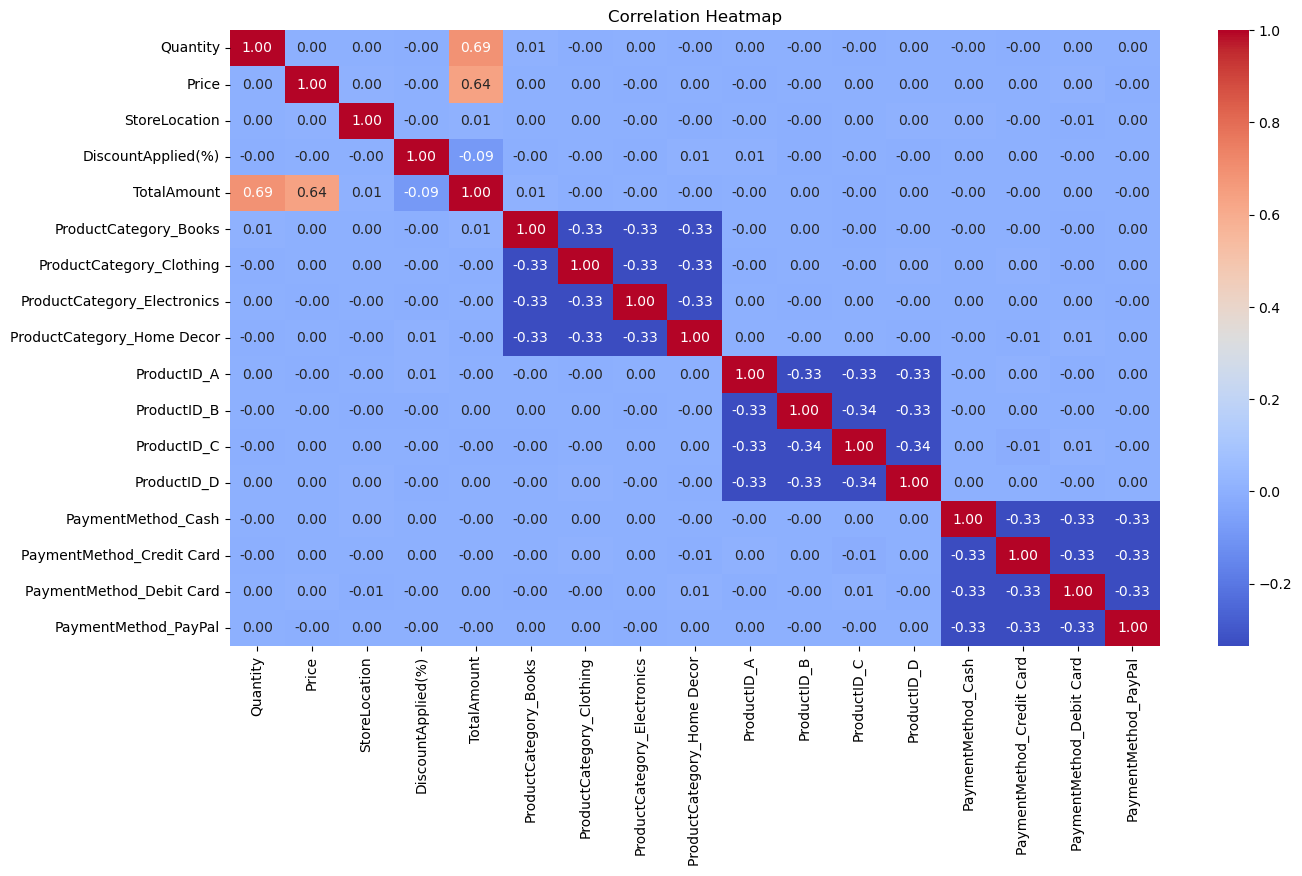

In [47]:
correlationdf = pd.DataFrame(df_original)

correlationdf.drop(columns=['CustomerID'], axis=1, inplace=True, errors='ignore')
correlationdf.drop(columns=['TransactionDate'], axis=1, inplace=True, errors='ignore')

correlationdf = pd.get_dummies(correlationdf, columns=['ProductCategory','ProductID','PaymentMethod'])

encoder = LabelEncoder()
correlationdf['StoreLocation'] = encoder.fit_transform (correlationdf['StoreLocation'])

plt.figure(figsize=(15,8))
sns.heatmap(correlationdf.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We will now check the correlation between numerical variables

In [48]:
correlation = df_original[numerical_cols].corr(method='pearson')
columns = correlation.nlargest(10, 'TotalAmount').index
columns

Index(['TotalAmount', 'Quantity', 'Price', 'DiscountApplied(%)'], dtype='object')

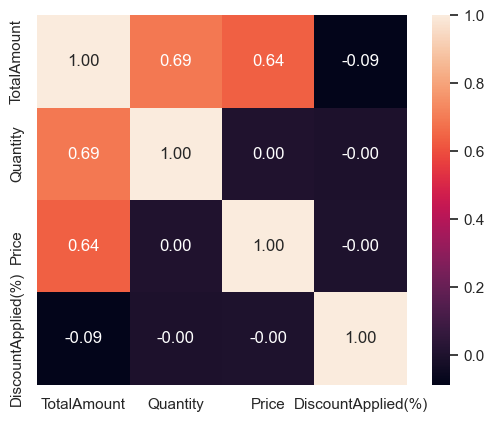

In [49]:
correlation_map = np.corrcoef(df_original[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [50]:
df_original[numerical_cols].corr()

,Quantity,DiscountApplied(%),Price,TotalAmount
Quantity,1.000000,-0.003632,0.001787,0.691847
DiscountApplied(%),-0.003632,1.000000,-0.000068,-0.087858
Price,0.001787,-0.000068,1.000000,0.636294
TotalAmount,0.691847,-0.087858,0.636294,1.000000


### Scatter plots for features with higher correlation

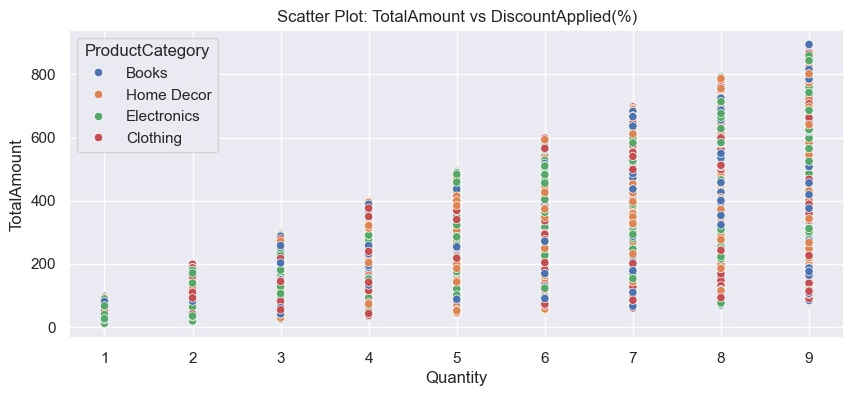

In [51]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df_original['Quantity'], y=df_original['TotalAmount'],hue= df_original[ 'ProductCategory'])
plt.title("Scatter Plot: TotalAmount vs DiscountApplied(%)")
plt.show()

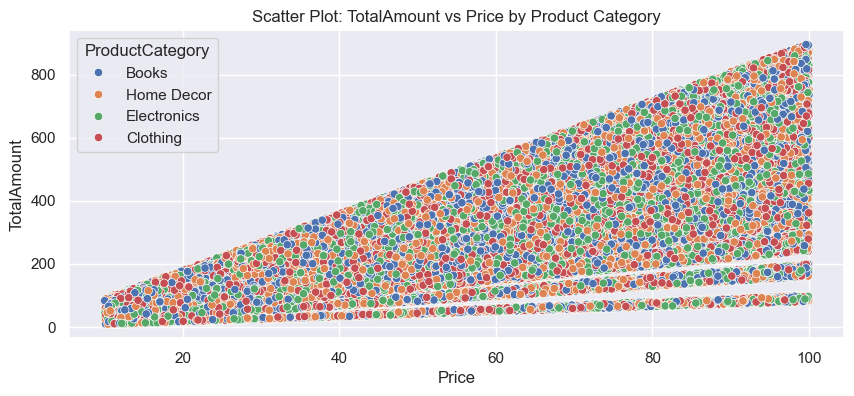

In [52]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df_original['Price'], y=df_original['TotalAmount'], hue= df_original[ 'ProductCategory'])
plt.title("Scatter Plot: TotalAmount vs Price by Product Category")
plt.show()

## Data Preprocessing

Handle missing values appropriately (fill or drop)

In [53]:
print (df_original.isnull().sum().sort_values(ascending=False))

CustomerID            0
ProductID             0
Quantity              0
Price                 0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


We will now drop Customer ID as it is irrelevant irrelevants for our analysis and will call this new dataframe as df

In [54]:
df = pd.DataFrame(df_original)

df.drop(columns=['CustomerID'], axis=1, inplace=True, errors='ignore')
df.head()

,ProductID,Quantity,Price,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
TransactionDate,,,,,,,,
2023-12-26 12:32:00,C,7,80.079844,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
2023-08-05 00:00:00,C,4,75.195229,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2024-03-11 18:51:00,A,8,31.528816,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
2023-10-27 22:00:00,D,5,98.880218,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
2023-12-22 11:38:00,A,7,93.188512,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


Encode categorical variables

In the following step, we will use one hot encoding for ProductID and PaymentMethod and continue by using Label encode for store location

In [55]:
df = pd.get_dummies(df, columns=['ProductID','PaymentMethod'])

encoder = LabelEncoder()
df['StoreLocation'] = encoder.fit_transform (df['StoreLocation'])

df.head()

,Quantity,Price,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,ProductID_A,ProductID_B,ProductID_C,ProductID_D,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal
TransactionDate,,,,,,,,,,,,,,
2023-12-26 12:32:00,7,80.079844,15470,Books,18.677100,455.862764,0,0,1,0,1,0,0,0
2023-08-05 00:00:00,4,75.195229,10325,Home Decor,14.121365,258.306546,0,0,1,0,1,0,0,0
2024-03-11 18:51:00,8,31.528816,81234,Books,15.943701,212.015651,1,0,0,0,1,0,0,0
2023-10-27 22:00:00,5,98.880218,78091,Books,6.686337,461.343769,0,0,0,1,0,0,0,1
2023-12-22 11:38:00,7,93.188512,656,Electronics,4.030096,626.030484,1,0,0,0,1,0,0,0


Now we will apply feature scaling to numerical columns using StandardScaler()

In [56]:
numerical = ['Quantity', 'DiscountApplied(%)','TotalAmount' ]
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,Quantity,Price,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,ProductID_A,ProductID_B,ProductID_C,ProductID_D,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal
TransactionDate,,,,,,,,,,,,,,
2023-12-26 12:32:00,0.771654,80.079844,15470,Books,1.497870,1.124484,0,0,1,0,1,0,0,0
2023-08-05 00:00:00,-0.391229,75.195229,10325,Home Decor,0.709613,0.054031,0,0,1,0,1,0,0,0
2024-03-11 18:51:00,1.159282,31.528816,81234,Books,1.024923,-0.196795,1,0,0,0,1,0,0,0
2023-10-27 22:00:00,-0.003601,98.880218,78091,Books,-0.576835,1.154182,0,0,0,1,0,0,0,1
2023-12-22 11:38:00,0.771654,93.188512,656,Electronics,-1.036431,2.046533,1,0,0,0,1,0,0,0


# 3. Train-Test Split

In [57]:
df_model_split = pd.DataFrame(df)

x = df_model_split.drop('ProductCategory', axis=1)
y = df_model_split['ProductCategory']

y_categorical = df_model_split['ProductCategory'].astype('category')
y = y_categorical.cat.codes

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

## Random Forest

In [58]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.25      0.25      5006
           1       0.25      0.26      0.26      5011
           2       0.25      0.25      0.25      4998
           3       0.25      0.24      0.24      4985

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.25      0.25      0.25     20000



Findings:

Precision: (0.24 - 0.25) means that when Random forest predicted a transaction belonging to a specific ProductCategory, it was only acurate 24-25% of the time. The remaining 75-76% of the transactions it predicted, actually belonged to a different ProductCategory. Which indicates a high number of false positives.

Recal: (0.24 - 0.25) means that out of all actual transactions belonging to a specific ProductCategory, the model correctly identified about 24-26% of them, missing a large majority (74-76%) of the transactions for each category, and classified them as something else (false negatives).

F1- score: (0.25) also reflects the poor performance of the model. A value of 0.25 suggests a very poor balance between precision and recall for each category.

Support: (5000 for each category) the equal support for each category (0, 1, 2, 3) confirms that the dataset is relatively balanced in terms of the number of tranactions for ProductCategory. This rules out class imbalance as the primary reason for the poor performance.

Accuracy: (0.25) This accuracy strongly suggests that the Random forest model, it is not accurate in distinguishing patterns between the different Product Category Values.

#### Suggestion:

Add feature engineering as a step to build the model to provide Random forest with more informative signals, such as values being more likely to be purchased at specific times of the year, or days of the week or even hours of the day.


## Logistic Regression

In [59]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(X_train, y_train)

y_pred = model.predict(X_test)

In [60]:
print('Accuracy_score:',accuracy_score(y_pred, y_test))
print('Precision_score',precision_score(y_test, y_pred,average='weighted'))
print('Recall_score',recall_score(y_test, y_pred,average='weighted'))

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

Accuracy_score: 0.2503
Precision_score 0.06265009
Recall_score 0.2503
                     Actual  Predicted
TransactionDate                       
2023-11-18 08:00:00       0          0
2023-11-19 19:27:00       1          0
2023-10-24 20:06:00       0          0
2023-12-30 16:28:00       2          0
2023-11-17 01:06:00       3          0
...                     ...        ...
2024-03-15 16:32:00       0          0
2024-04-17 02:02:00       3          0
2024-03-20 21:21:00       2          0
2024-04-07 18:37:00       3          0
2023-05-26 04:47:00       0          0

[20000 rows x 2 columns]


C:\Users\edmundobf\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Findings:

Accuracy Score: 0.2503: This means that the model correctly predicted the ProductCategory for approximately 25.03% of the transactions in the test set. In a balanced four-class problem, random guessing would also have an accuracy of around 25%. This suggests the model is performing no better than random chance.

Precision Score: 0.06265009: Precision_score is slightly more ambiguous in a multi-class setting. A single Precision_score represents a binary classification problem or a specific way of averaging precision across classes. Out of all the transactions, the model predicted only 6.27% as belonging to the class, indicating a very high number of false positivies for that specific class.

Recal score: 0.2503 means that the model correctly identified about 25.03% of all the actual transactions as belonging to the class.

Actual: 0, 1, 2, 3

Predicted: 0

This behaviour explains the very low precision and the recal of 0.25 is only predicting 25% of the actual.

The Logistic Regression model is not effectively predicting the Product Category. With a strong leaning towards predicting class 0 and the overall accuracy, precision and recal, highlight the need for further investigation for potential data imbalances

### K - Nearest Neighbors (KNN)

First we will import the necessary libraries to explore the model.

Next we will tain the model

Make predictions

And finalize with model evaluation

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision (macro):", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_knn, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_knn, average='macro'))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Classifier Evaluation:
Accuracy: 0.2512
Precision (macro): 0.25124311861153936
Recall (macro): 0.2510847956706375
F1 Score (macro): 0.2465479955483944

Confusion Matrix:
[[1699 1407 1109  791]
 [1682 1421 1061  847]
 [1725 1386 1103  784]
 [1750 1357 1077  801]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.34      0.29      5006
           1       0.26      0.28      0.27      5011
           2       0.25      0.22      0.24      4998
           3       0.25      0.16      0.20      4985

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.25      0.25      0.25     20000



Findings:
    
Accuracy (0.2512): Only 25% of the product category predictions are correct.

Precision (macro) (0.2512): On average, only 25% of the items in the model were predicted to be in a particular category that actually belongs to that category, indicating an high number of false positives across all classes.

Recall (macro) (0.2511): the model correctly identifies 25% of all the actual items belonging to each category, indicating an high number of false negatives across all classes.

F1-Score (macro) (0.2465): The F1-score, which balances precision and recall, confirms the poor overall performance of the model in correctly classifying the product categories.

Confusion Matrix: The confusion matrix clearly shows that for each actual product category (rows), the predictions are distributed evenly across all four predicted categories (columns). The lack of a strong diagonal, visually confirms that the model is not effectively distinguishing between the classes. 

Classification Report (Per-Class Metrics): The precision, recall, and F1-score for each individual product category are low (0.25), indicating that the model is performing poorly for all specific categories. 